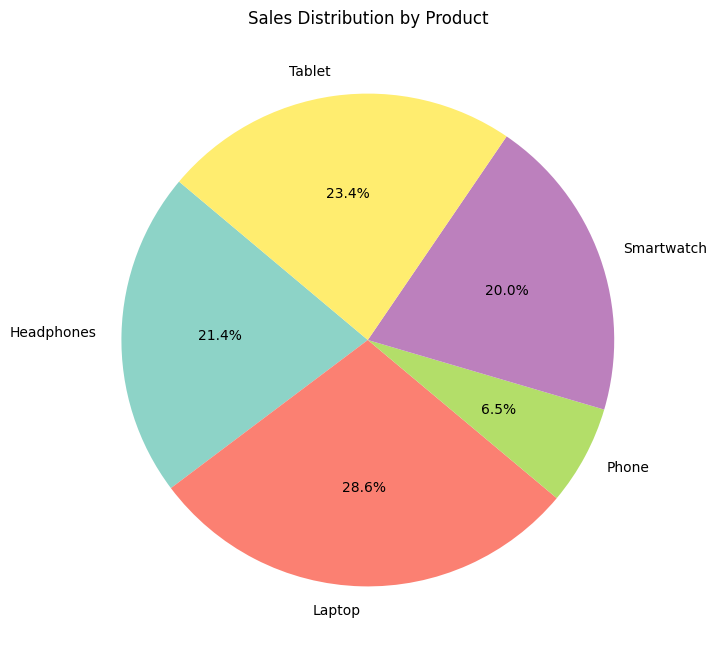

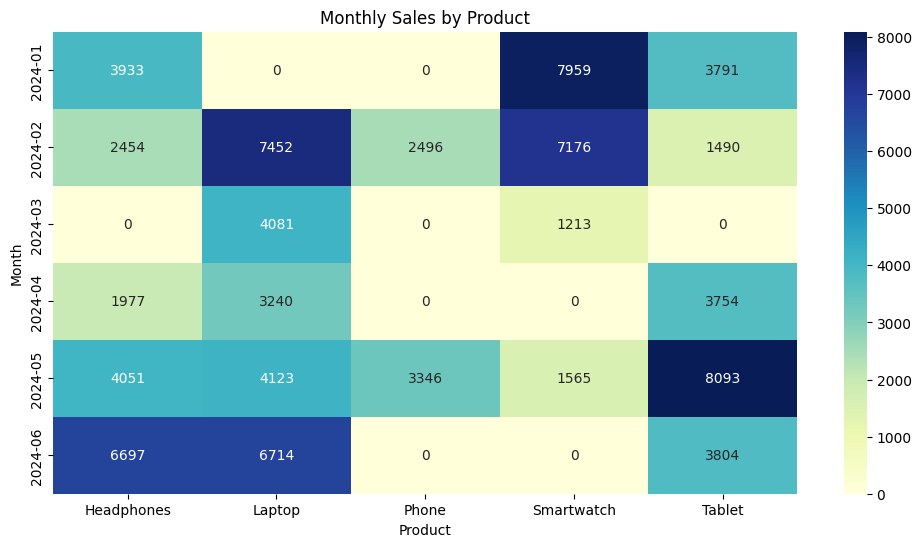

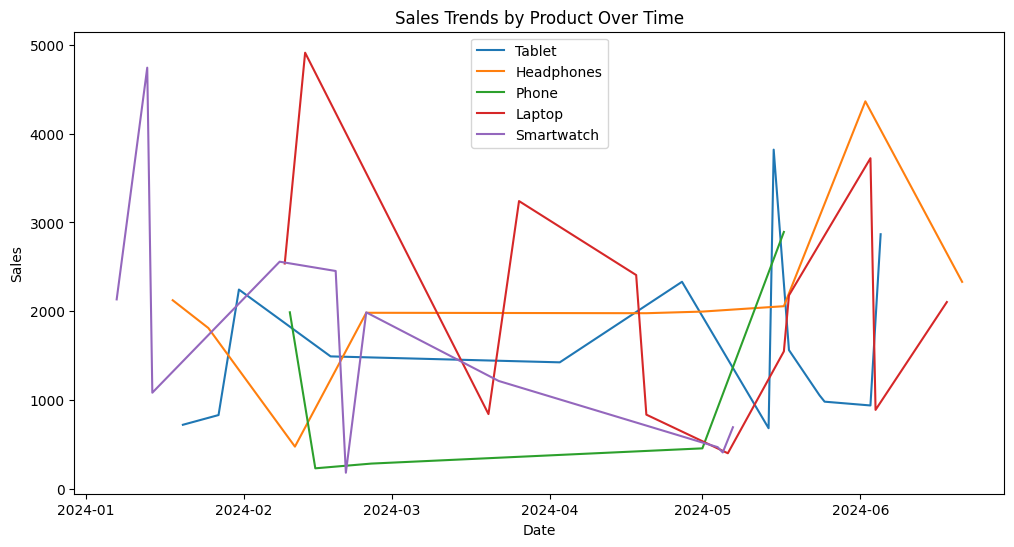

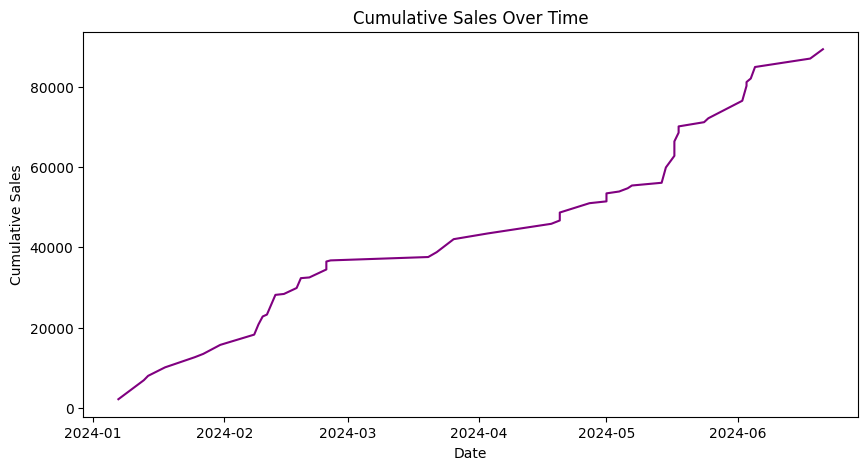

Visualization notebook completed: pie chart, heatmap, product trends, and cumulative sales plotted.


In [1]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load cleaned data
df = pd.read_csv("../data/processed/sales_data_clean.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

# 3. Pie chart - Sales distribution by product
sales_by_product = df.groupby('Product')['Sales'].sum()
plt.figure(figsize=(8,8))
sales_by_product.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title("Sales Distribution by Product")
plt.ylabel("")
plt.show()

# 4. Heatmap - Sales by product and month
sales_pivot = df.pivot_table(index='Month', columns='Product', values='Sales', aggfunc='sum').fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Monthly Sales by Product")
plt.xlabel("Product")
plt.ylabel("Month")
plt.show()

# 5. Sales trends by product over time
plt.figure(figsize=(12,6))
for product in df['Product'].unique():
    product_data = df[df['Product'] == product].groupby('Date')['Sales'].sum()
    plt.plot(product_data.index, product_data.values, label=product)
plt.title("Sales Trends by Product Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# 6. Cumulative sales over time
df_sorted = df.sort_values('Date')
df_sorted['Cumulative Sales'] = df_sorted['Sales'].cumsum()
plt.figure(figsize=(10,5))
plt.plot(df_sorted['Date'], df_sorted['Cumulative Sales'], color='purple')
plt.title("Cumulative Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Sales")
plt.show()

# 7. Summary
print("Visualization notebook completed: pie chart, heatmap, product trends, and cumulative sales plotted.")
